In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline  
matplotlib.rcParams['figure.figsize'] = (12, 8) 


In [2]:
df = pd.read_csv(r"C:\Users\barvi\Documents\Proyectos\Proyecto_1\data\movies.csv")

In [3]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
#confirming if there is any missing data.

for col in df.columns:
   pct_missing =  np.mean(df[col].isnull())
   print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#lets take a look at the null values 
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
# Muestra el porcentaje de nulos por columna
df.isnull().mean() * 100

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

In [8]:
#Changing data type.
df['budget'] = df['budget'].astype('Int64') 
df['gross'] = df['gross'].astype('Int64')

In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime     float64
dtype: object

In [10]:
pd.set_option('display.max_rows', None)

In [12]:
# If there are any duplicates lets drop it.
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

## Cleaning data
Debido a valores con 0 en budget, filtramos las filas que tengan y budget >0 para que no perjudique los resultados. 

In [42]:
df_data = df[(df['budget'] > 0) & (df['gross'] > 0)].copy()


In [14]:
pd.options.display.float_format = '{:.2f}'.format

In [15]:
#Observando cuantas filas hay antes y despues.
perdidas = df.shape[0] - df_data.shape[0]
print(f"Filas totales originales: {df.shape[0]}")
print(f"Se eliminaron {perdidas} películas que no tenían datos de presupuesto o ganancias.")

Filas totales originales: 7668
Se eliminaron 2232 películas que no tenían datos de presupuesto o ganancias.


# EDA 

In [16]:
df_data.describe()

,year,score,votes,budget,gross,runtime
count,5436.00,5436.00,5436.00,5436.00,5436.00,5435.00
mean,2001.65,6.39,114911.04,35938637.62,103004458.12,108.16
std,10.54,0.96,184225.48,41547704.90,187105108.71,18.12
min,1980.00,1.90,195.00,6000.00,309.00,63.00
25%,1993.00,5.80,19000.00,10000000.00,10674118.75,95.00
50%,2002.00,6.50,52000.00,21000000.00,36711988.00,105.00
75%,2011.00,7.10,129000.00,45000000.00,111947847.75,118.00
max,2020.00,9.30,2400000.00,356000000.00,2847246203.00,271.00


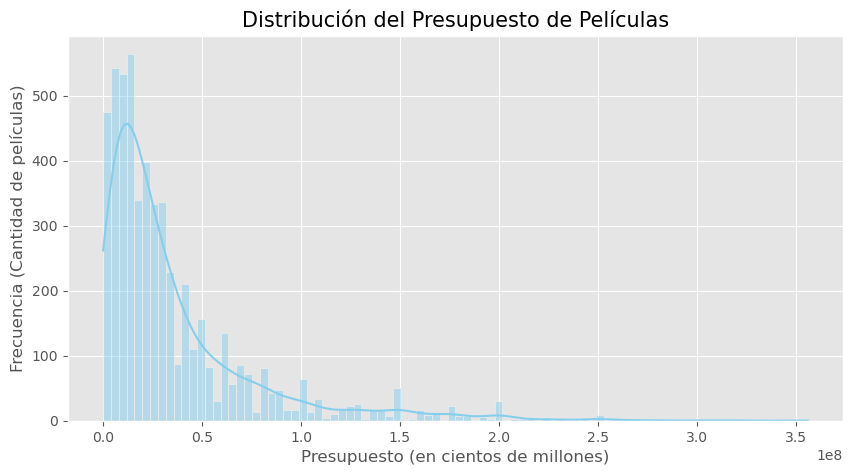

In [17]:
# Histograma de Budget.
plt.figure(figsize=(10, 5))
sns.histplot(df_data['budget'], kde=True, color='skyblue')
plt.title('Distribución del Presupuesto de Películas', fontsize=15)
plt.xlabel('Presupuesto (en cientos de millones)', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de películas)', fontsize=12)
plt.show()

   La variable Presupuesto presenta una distribución con sesgo positivo. Esto confirma la Ley de Pareto: una minoría de películas concentra la mayor cantidad de inversión financiera.
Puedo concluir: 
1. El mercado cinematográfico está dominado por un gran volumen de producciones de bajo costo (la "mayoría").
2. El mercado está impulsado financieramente por un pequeño número de producciones de muy alto costo (la "minoría" de la cola larga).

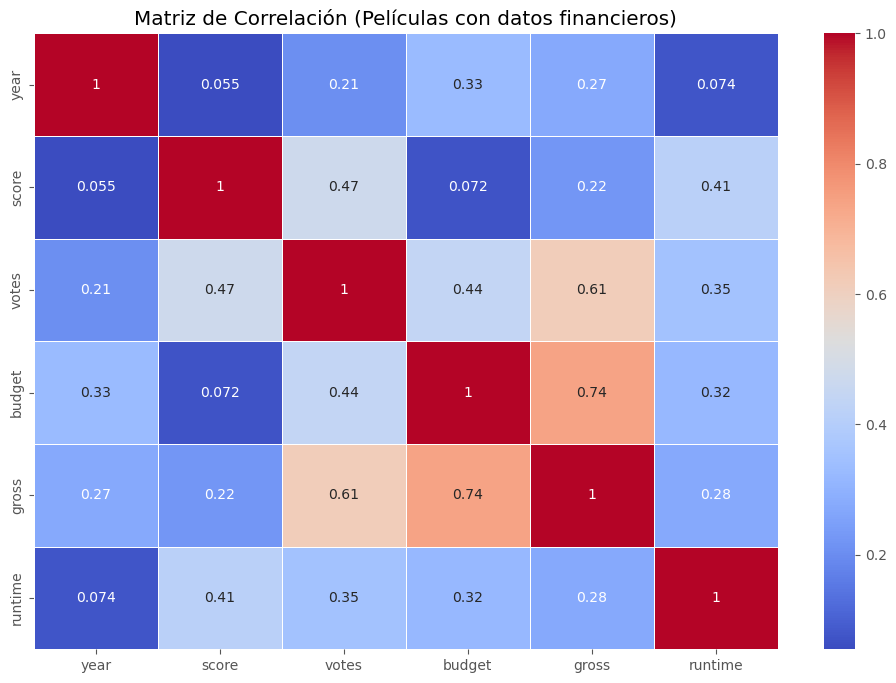

In [18]:
#Que factores estan mas relacionados al gross 
data_correlation = df_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(data_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación (Películas con datos financieros)')
plt.show()

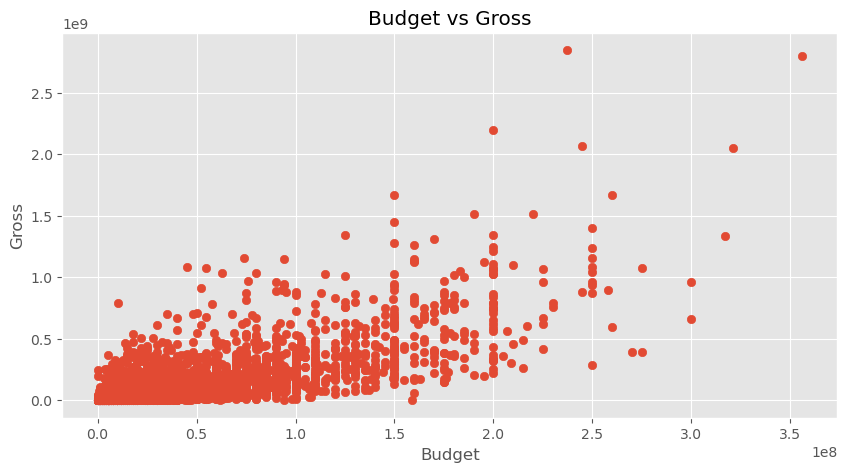

In [19]:
plt.figure(figsize=(10,5))

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()


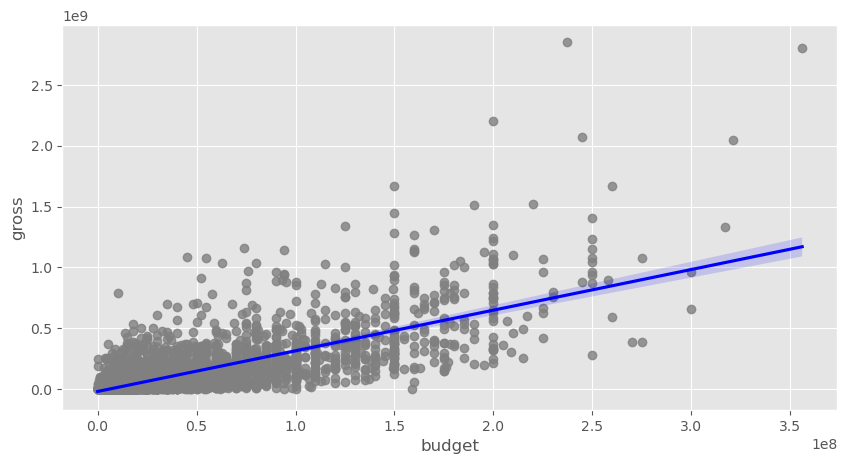

In [20]:
#plot budget vs gross using seaborn 
plt.figure(figsize=(10, 5))

sns.regplot(x='budget', y='gross', data= df_data, 
            scatter_kws={"color": "gray"},
            line_kws={"color": "blue"})
plt.show()

Aunque existe una tendencia lineal positiva clara (a mayor presupuesto, mayor recaudación), se observa una varianza creciente en los presupuestos altos. Esto indica que, si bien invertir más aumenta las ganancias potenciales, también aumenta el riesgo financiero absoluto: un fracaso en una superproducción genera pérdidas millonarias, mientras que en bajo presupuesto el riesgo es contenido.Y se observan algunos presupuestos con bajo retorno de inversion, es decir con bajos ingresos.

In [22]:
#correlaciones 

correlation = df_data.corr(numeric_only=True)
print(correlation)

         year  score  votes  budget  gross  runtime
year     1.00   0.06   0.21    0.33   0.27     0.07
score    0.06   1.00   0.47    0.07   0.22     0.41
votes    0.21   0.47   1.00    0.44   0.61     0.35
budget   0.33   0.07   0.44    1.00   0.74     0.32
gross    0.27   0.22   0.61    0.74   1.00     0.28
runtime  0.07   0.41   0.35    0.32   0.28     1.00


<Figure size 1000x800 with 0 Axes>

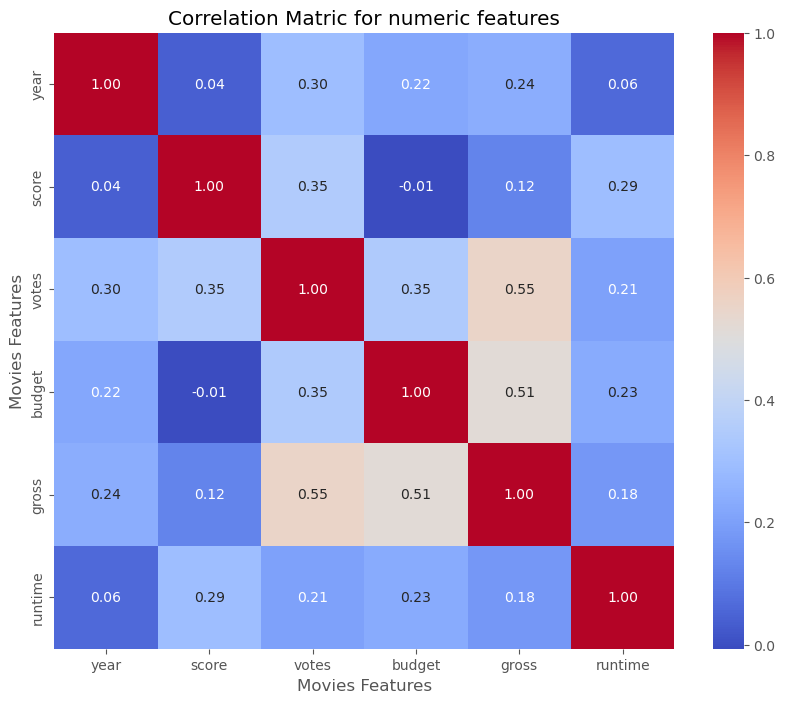

In [35]:
correlation_matrix = df_data.corr(method='kendall', numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,    
            cmap='coolwarm',
            fmt=".2f")  
plt.title('Correlation Matric for numeric features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [50]:
#conviritendo los datos en category 

df_numerized = df_data
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.40,927000.00,1800,2841,700,46,19000000,46998772,1432,146.00
1,3943,6,1,1980,1131,5.80,65000.00,1581,1160,215,47,4500000,58853106,454,104.00
2,3654,4,0,1980,1363,8.70,1200000.00,759,1822,1161,47,18000000,538375067,949,124.00
3,205,4,4,1980,1131,7.70,221000.00,891,1416,1478,47,3500000,83453539,1114,88.00
4,734,6,4,1980,1174,7.30,108000.00,721,352,272,47,6000000,39846344,1089,98.00


In [51]:
df_data.head(5)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.40,927000.00,1800,2841,700,46,19000000,46998772,1432,146.00
1,3943,6,1,1980,1131,5.80,65000.00,1581,1160,215,47,4500000,58853106,454,104.00
2,3654,4,0,1980,1363,8.70,1200000.00,759,1822,1161,47,18000000,538375067,949,124.00
3,205,4,4,1980,1131,7.70,221000.00,891,1416,1478,47,3500000,83453539,1114,88.00
4,734,6,4,1980,1174,7.30,108000.00,721,352,272,47,6000000,39846344,1089,98.00


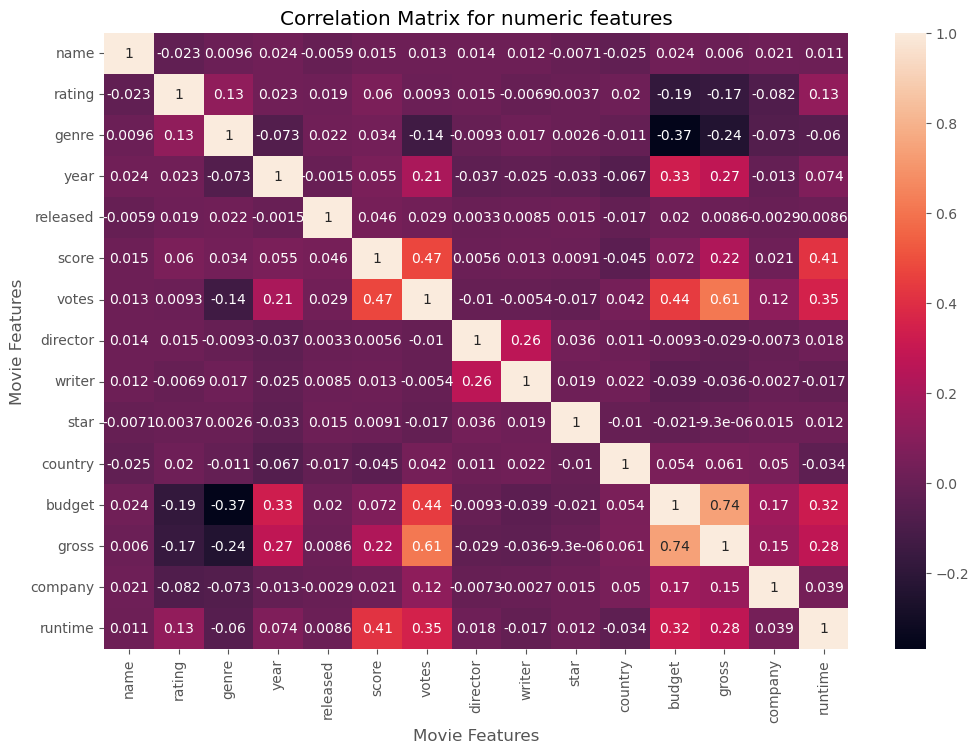

In [48]:
correlation_matrix2 = df_numerized.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix2, annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [49]:
 df_numerized.corr(method='pearson', numeric_only=True)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.00,-0.02,0.01,0.02,-0.01,0.01,0.01,0.01,0.01,-0.01,-0.02,0.02,0.01,0.02,0.01
rating,-0.02,1.00,0.13,0.02,0.02,0.06,0.01,0.01,-0.01,0.00,0.02,-0.19,-0.17,-0.08,0.13
genre,0.01,0.13,1.00,-0.07,0.02,0.03,-0.14,-0.01,0.02,0.00,-0.01,-0.37,-0.24,-0.07,-0.06
year,0.02,0.02,-0.07,1.00,-0.00,0.06,0.21,-0.04,-0.02,-0.03,-0.07,0.33,0.27,-0.01,0.07
released,-0.01,0.02,0.02,-0.00,1.00,0.05,0.03,0.00,0.01,0.02,-0.02,0.02,0.01,-0.00,0.01
score,0.01,0.06,0.03,0.06,0.05,1.00,0.47,0.01,0.01,0.01,-0.04,0.07,0.22,0.02,0.41
votes,0.01,0.01,-0.14,0.21,0.03,0.47,1.00,-0.01,-0.01,-0.02,0.04,0.44,0.61,0.12,0.35
director,0.01,0.01,-0.01,-0.04,0.00,0.01,-0.01,1.00,0.26,0.04,0.01,-0.01,-0.03,-0.01,0.02
writer,0.01,-0.01,0.02,-0.02,0.01,0.01,-0.01,0.26,1.00,0.02,0.02,-0.04,-0.04,-0.00,-0.02
star,-0.01,0.00,0.00,-0.03,0.02,0.01,-0.02,0.04,0.02,1.00,-0.01,-0.02,-0.00,0.02,0.01


In [52]:
correlation_mat =  df_numerized.corr(method='pearson', numeric_only=True)
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.00
          rating     -0.02
          genre       0.01
          year        0.02
          released   -0.01
          score       0.01
          votes       0.01
          director    0.01
          writer      0.01
          star       -0.01
          country    -0.02
          budget      0.02
          gross       0.01
          company     0.02
          runtime     0.01
rating    name       -0.02
          rating      1.00
          genre       0.13
          year        0.02
          released    0.02
          score       0.06
          votes       0.01
          director    0.01
          writer     -0.01
          star        0.00
          country     0.02
          budget     -0.19
          gross      -0.17
          company    -0.08
          runtime     0.13
genre     name        0.01
          rating      0.13
          genre       1.00
          year       -0.07
          released    0.02
          score       0.03
          votes      -0.14
 

In [54]:
sortes_values = corr_pairs.sort_values()
sortes_values

genre     budget     -0.37
budget    genre      -0.37
gross     genre      -0.24
genre     gross      -0.24
rating    budget     -0.19
budget    rating     -0.19
gross     rating     -0.17
rating    gross      -0.17
genre     votes      -0.14
votes     genre      -0.14
rating    company    -0.08
company   rating     -0.08
          genre      -0.07
genre     company    -0.07
          year       -0.07
year      genre      -0.07
          country    -0.07
country   year       -0.07
runtime   genre      -0.06
genre     runtime    -0.06
score     country    -0.04
country   score      -0.04
writer    budget     -0.04
budget    writer     -0.04
year      director   -0.04
director  year       -0.04
gross     writer     -0.04
writer    gross      -0.04
runtime   country    -0.03
country   runtime    -0.03
star      year       -0.03
year      star       -0.03
director  gross      -0.03
gross     director   -0.03
writer    year       -0.02
year      writer     -0.02
country   name       -0.02
n

In [55]:
high_corr = sortes_values[(sortes_values) > 0.5]
high_corr

votes     gross      0.61
gross     votes      0.61
budget    gross      0.74
gross     budget     0.74
released  released   1.00
score     score      1.00
rating    rating     1.00
name      name       1.00
genre     genre      1.00
year      year       1.00
director  director   1.00
votes     votes      1.00
writer    writer     1.00
star      star       1.00
budget    budget     1.00
country   country    1.00
gross     gross      1.00
company   company    1.00
runtime   runtime    1.00
dtype: float64